In [1]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the file

In [5]:
df = pd.read_csv("../movies_metadata.csv")
print(df.head())

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

c:\users\sophi\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Droping none numeric values

In [6]:
df.drop(df.index[19730], inplace=True)
df.drop(df.index[29502], inplace=True)
df.drop(df.index[35585], inplace=True)

In [7]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [8]:
df_numeric = df[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'title', 'id']]

In [9]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,id
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story,862
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji,8844
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,15602
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale,31357
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,11862


## Getting rid of null rows

In [10]:
df_numeric.isnull().sum()

budget            0
popularity        3
revenue           3
runtime         260
vote_average      3
vote_count        3
title             3
id                0
dtype: int64

In [11]:
df_numeric.dropna(inplace=True)

<ipython-input-11-6b0fc49f877c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.dropna(inplace=True)


## Looking at vote count

In [12]:
df_numeric['vote_count'].describe()

count    45203.000000
mean       110.506515
std        492.638190
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

## Take only the movies that have more than 30 votes (top 26% of movies)

In [13]:
df_numeric['vote_count'].quantile(np.arange(.74, 1, 0.01))

0.74      32.00
0.75      34.00
0.76      37.00
0.77      40.00
0.78      43.00
0.79      46.00
0.80      51.00
0.81      55.00
0.82      61.00
0.83      67.00
0.84      74.00
0.85      83.00
0.86      92.00
0.87     104.74
0.88     119.00
0.89     139.00
0.90     161.00
0.91     193.00
0.92     230.00
0.93     283.00
0.94     349.00
0.95     435.90
0.96     581.00
0.97     827.94
0.98    1243.88
0.99    2196.84
Name: vote_count, dtype: float64

In [14]:
df_numeric = df_numeric[df_numeric['vote_count']>30]

In [15]:
df_numeric.shape

(12178, 8)

## Normalize the data using MinMax scaling

In [16]:
from sklearn import preprocessing

In [23]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_numeric.drop(['title','id'], axis=1))

In [24]:
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_numeric.index, columns=df_numeric.columns[:-2])

In [25]:
df_numeric_scaled.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,0.078947,0.040082,0.133988,0.092360,0.810526,0.383367
1,0.171053,0.031075,0.094261,0.118586,0.726316,0.169610
2,0.000000,0.021389,0.000000,0.115165,0.684211,0.004343
3,0.042105,0.007045,0.029216,0.144812,0.642105,0.000214
4,0.000000,0.015315,0.027468,0.120867,0.600000,0.010111


## Apply K-Means Clustering

In [26]:
kmeans = KMeans(n_clusters=5)

In [27]:
kmeans.fit(df_numeric_scaled)

KMeans(n_clusters=5)

In [28]:
len(kmeans.labels_)

12178

Adding cluster column

In [29]:
df_numeric['cluster'] = kmeans.labels_

In [30]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,id,cluster
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story,862,4
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji,8844,2
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,15602,3
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale,31357,3
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,11862,3


## Interpreting Results

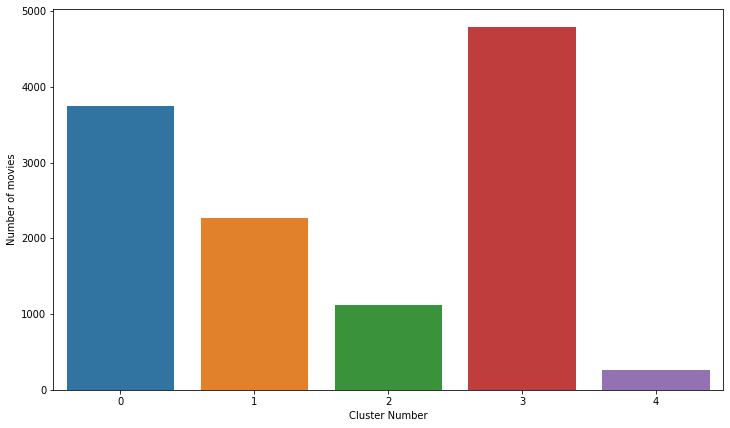

In [31]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=df_numeric.groupby(['cluster']).count()['budget'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [32]:
df_numeric.groupby(['cluster']).mean()

,revenue,runtime,vote_average,vote_count
cluster,,,,
0,1.692182e+07,109.899038,7.278713,305.669338
1,1.028055e+07,93.718130,4.940979,122.632554
2,1.615357e+08,114.289661,6.208645,1125.987522
3,1.443148e+07,100.397492,6.189028,169.585371
4,6.288649e+08,126.146154,6.903846,4738.096154


In [58]:
size_array = list(df_numeric.groupby(['cluster']).count()['budget'].values)

Sample of movies in cluster 4

In [34]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[0])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,id,cluster
13693,200000000,16.5075,371353001.0,115.0,5.9,2496.0,Terminator Salvation,534,4
18972,225000000,10.6844,624026776.0,106.0,6.3,4228.0,Men in Black 3,41154,4
21025,75000000,17.852,117698894.0,115.0,7.3,5635.0,Now You See Me,75656,4
16130,260000000,14.6848,591794936.0,100.0,7.4,3419.0,Tangled,38757,4
11067,270000000,13.2847,391081192.0,154.0,5.4,1429.0,Superman Returns,1452,4


Sample of movies in cluster 2

In [35]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[1])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,id,cluster
16763,50000000,9.38838,144492830.0,109.0,5.9,1606.0,I Am Number Four,46529,2
21380,90000000,10.3382,174578751.0,106.0,5.9,1685.0,Percy Jackson: Sea of Monsters,76285,2
43190,125000000,7.903731,0.0,705.0,8.2,725.0,Band of Brothers,331214,2
13057,55000000,11.6724,113020255.0,141.0,7.3,1151.0,Changeling,3580,2
9541,50000000,6.93668,34808403.0,119.0,7.1,781.0,The Life Aquatic with Steve Zissou,421,2


Sample of movies in cluster 1

In [36]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[2])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,id,cluster
24389,0,4.47888,0.0,89.0,5.3,63.0,Stage Fright,156597,1
19681,20000000,5.74521,52302796.0,94.0,5.1,435.0,Silent Hill: Revelation 3D,61012,1
6266,0,5.91619,61801971.0,122.0,5.4,35.0,The Electric Horseman,11145,1
6602,0,5.84474,21384035.0,118.0,4.9,114.0,Cold Creek Manor,12767,1
10858,50000000,4.87891,61112916.0,98.0,4.5,138.0,The Shaggy Dog,10067,1


Sample of movies in cluster 0

In [37]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[3])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,id,cluster
7635,0,11.0638,19516000.0,174.0,7.9,305.0,La Dolce Vita,439,0
18525,30000000,9.5243,196114570.0,104.0,7.0,1328.0,The Vow,72570,0
4208,0,4.18951,0.0,107.0,7.1,51.0,Nightwatch,6498,0
28208,0,2.1716,0.0,95.0,7.0,36.0,Boy Meets Girl,263105,0
10582,0,6.16362,0.0,91.0,7.1,91.0,The Driver,2153,0


Sample of movies in cluster 3

In [38]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[4])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,id,cluster
16733,0,3.57403,0.0,105.0,6.0,45.0,The Infidel,42171,3
6985,32000000,10.6944,0.0,101.0,6.7,90.0,The Cooler,10744,3
24191,15000000,13.3106,32556119.0,108.0,6.0,645.0,The November Man,254904,3
12258,0,2.6476,0.0,88.0,5.8,32.0,Sex and Fury,20567,3
15706,20000000,7.27565,65464324.0,104.0,5.8,488.0,The American,27579,3


In [39]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,id,cluster
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story,862,4
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji,8844,2
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,15602,3
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale,31357,3
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,11862,3


## Calculating Distance to Centroids

In [65]:
dist = kmeans.transform(df_numeric_scaled)**2
df_numeric['distance'] = dist.sum(axis=1).round(4)
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,id,cluster,distance
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story,862,4,0.8393
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji,8844,2,0.3268
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,15602,3,0.3886
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale,31357,3,0.3396
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,11862,3,0.3892


## Ranking Cluster0 Movies

creating the cluster0 data frame

In [150]:
df_cluster0 = df_numeric[(df_numeric['cluster']==0)]
df_cluster0['popularity'] = pd.to_numeric(df_cluster0['popularity'], downcast='float')

<ipython-input-150-933c812da073>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster0['popularity'] = pd.to_numeric(df_cluster0['popularity'], downcast='float')


Normalizing cluster0 data

In [151]:
minmax_processed_cluster0 = preprocessing.MinMaxScaler().fit_transform(df_cluster0.drop(['title','id','cluster'], axis=1))
df_numeric_scaled_cluster0 = pd.DataFrame(minmax_processed_cluster0, index=df_cluster0.index, columns=df_cluster0.columns[:-3])

Ranking the movies based on popularity and distance

In [152]:
sum_column = df_numeric_scaled_cluster0['popularity'] - df_numeric_scaled_cluster0['title']
df_cluster0['Rank'] = sum_column
df_cluster0.sort_values("Rank", inplace = True, ascending=False)

df_cluster0.head()

<ipython-input-152-632cd372bd9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster0['Rank'] = sum_column
<ipython-input-152-632cd372bd9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster0.sort_values("Rank", inplace = True, ascending=False)


,budget,popularity,revenue,runtime,vote_average,vote_count,title,id,cluster,distance,Rank
536,28000000,96.272377,33139618.0,117.0,7.9,3833.0,Blade Runner,78,0,0.7016,0.895288
44624,0,60.581223,0.0,123.0,7.3,598.0,What Happened to Monday,406990,0,0.4561,0.585803
23673,3300000,64.299988,13092000.0,105.0,8.3,4376.0,Whiplash,244786,0,0.8428,0.527931
45167,11000000,40.796776,184770205.0,111.0,7.4,181.0,Wind River,395834,0,0.4117,0.391367
42185,5000000,38.995136,10025571.0,98.0,6.8,651.0,Before I Fall,397837,0,0.3685,0.383433


## Ranking Cluster1 Movies

Creating the cluster1 dataframe

In [155]:
df_cluster1 = df_numeric[(df_numeric['cluster']==1)]
df_cluster1['popularity'] = pd.to_numeric(df_cluster1['popularity'], downcast='float')

<ipython-input-155-f3dc5e84a662>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1['popularity'] = pd.to_numeric(df_cluster1['popularity'], downcast='float')


Normalizing cluster1 data

In [156]:
minmax_processed_cluster1 = preprocessing.MinMaxScaler().fit_transform(df_cluster1.drop(['title','id','cluster'], axis=1))
df_numeric_scaled_cluster1 = pd.DataFrame(minmax_processed_cluster1, index=df_cluster1.index, columns=df_cluster1.columns[:-3])

Ranking the movies based on popularity and distance

In [157]:
sum_column = df_numeric_scaled_cluster1['popularity'] - df_numeric_scaled_cluster1['title']
df_cluster1['Rank'] = sum_column
df_cluster1.sort_values("Rank", inplace = True, ascending=False)

df_cluster1.head()

<ipython-input-157-718092961be2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1['Rank'] = sum_column
<ipython-input-157-718092961be2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1.sort_values("Rank", inplace = True, ascending=False)


,budget,popularity,revenue,runtime,vote_average,vote_count,title,id,cluster,distance,Rank
33361,18000000,88.439240,20497844.0,110.0,5.4,1015.0,The Circle,339988,1,0.4412,0.942147
44271,6000000,78.807198,0.0,119.0,5.3,160.0,The Bad Batch,316154,1,0.4930,0.811188
45202,0,59.578823,0.0,90.0,5.3,127.0,Wish Upon,440597,1,0.4785,0.599654
39694,5500000,52.854103,44235023.0,89.0,5.1,548.0,47 Meters Down,403119,1,0.4482,0.536352
39517,5455000,50.949524,0.0,99.0,5.2,47.0,The Last King,360249,1,0.4646,0.507851


## Ranking Cluster2 Movies

Creating the cluster2 dataframe

In [159]:
df_cluster2 = df_numeric[(df_numeric['cluster']==2)]
df_cluster2['popularity'] = pd.to_numeric(df_cluster2['popularity'], downcast='float')

<ipython-input-159-d8c9f6250271>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster2['popularity'] = pd.to_numeric(df_cluster2['popularity'], downcast='float')


Normalizing cluster2 data

In [160]:
minmax_processed_cluster2 = preprocessing.MinMaxScaler().fit_transform(df_cluster2.drop(['title','id','cluster'], axis=1))
df_numeric_scaled_cluster2 = pd.DataFrame(minmax_processed_cluster2, index=df_cluster2.index, columns=df_cluster2.columns[:-3])

Ranking the movies based on popularity and distance

In [161]:
sum_column = df_numeric_scaled_cluster2['popularity'] - df_numeric_scaled_cluster2['title']
df_cluster2['Rank'] = sum_column
df_cluster2.sort_values("Rank", inplace = True, ascending=False)

df_cluster2.head()

<ipython-input-161-15bf9bfbaa3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster2['Rank'] = sum_column
<ipython-input-161-15bf9bfbaa3c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster2.sort_values("Rank", inplace = True, ascending=False)


,budget,popularity,revenue,runtime,vote_average,vote_count,title,id,cluster,distance,Rank
43644,34000000,228.032745,224511319.0,113.0,7.2,2083.0,Baby Driver,339403,2,1.0974,0.694907
24351,20000000,183.870377,88761661.0,101.0,7.0,5499.0,John Wick,245891,2,1.2489,0.445748
42902,97000000,72.884079,232380243.0,122.0,5.7,2677.0,Alien: Covenant,126889,2,0.4782,0.238785
42309,110000000,68.726677,169801921.0,107.0,5.9,2547.0,Ghost in the Shell,315837,2,0.4977,0.213422
45014,60000000,50.903591,71000000.0,95.0,5.7,688.0,The Dark Tower,353491,2,0.3240,0.198366


## Ranking Cluster 3 Movies

Creating the cluster3 dataframe

In [163]:
df_cluster3 = df_numeric[(df_numeric['cluster']==3)]
df_cluster3['popularity'] = pd.to_numeric(df_cluster3['popularity'], downcast='float')

<ipython-input-163-7243522838ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster3['popularity'] = pd.to_numeric(df_cluster3['popularity'], downcast='float')


Normalizing cluster3 data

In [166]:
minmax_processed_cluster3 = preprocessing.MinMaxScaler().fit_transform(df_cluster3.drop(['title','id','cluster'], axis=1))
df_numeric_scaled_cluster3 = pd.DataFrame(minmax_processed_cluster3, index=df_cluster3.index, columns=df_cluster3.columns[:-3])

Ranking the movies based on popularity and distance

In [167]:
sum_column = df_numeric_scaled_cluster3['popularity'] - df_numeric_scaled_cluster3['title']
df_cluster3['Rank'] = sum_column
df_cluster3.sort_values("Rank", inplace = True, ascending=False)

df_cluster3.head()

<ipython-input-167-2f999f2aab4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster3['Rank'] = sum_column
<ipython-input-167-2f999f2aab4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster3.sort_values("Rank", inplace = True, ascending=False)


,budget,popularity,revenue,runtime,vote_average,vote_count,title,id,cluster,distance,Rank
43286,38000000,88.561241,110824373.0,89.0,6.5,159.0,Captain Underpants: The First Epic Movie,268531,3,0.3943,0.605879
30534,26000000,25.301567,30523226.0,116.0,6.3,1122.0,Self/less,238615,3,0.2870,0.230682
43301,0,67.955055,0.0,87.0,5.8,333.0,Boyka: Undisputed IV,348893,3,0.4407,0.226545
45031,15000000,47.114365,0.0,87.0,6.0,113.0,Security,460846,3,0.3721,0.208027
12540,30000000,15.106676,105173115.0,111.0,6.4,1194.0,Forgetting Sarah Marshall,9870,3,0.2696,0.170555


## Ranking Cluster 4 Movies

Creating the cluster4 dataframe

In [169]:
df_cluster4 = df_numeric[(df_numeric['cluster']==4)]
df_cluster4['popularity'] = pd.to_numeric(df_cluster4['popularity'], downcast='float')

<ipython-input-169-08823a8f75c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster4['popularity'] = pd.to_numeric(df_cluster4['popularity'], downcast='float')


Normalizing cluster 4 data

In [170]:
minmax_processed_cluster4 = preprocessing.MinMaxScaler().fit_transform(df_cluster4.drop(['title','id','cluster'], axis=1))
df_numeric_scaled_cluster4 = pd.DataFrame(minmax_processed_cluster4, index=df_cluster4.index, columns=df_cluster4.columns[:-3])

Ranking the movies based on popularity and distance

In [171]:
sum_column = df_numeric_scaled_cluster4['popularity'] - df_numeric_scaled_cluster4['title']
df_cluster4['Rank'] = sum_column
df_cluster4.sort_values("Rank", inplace = True, ascending=False)

df_cluster4.head()

<ipython-input-171-7d9271537191>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster4['Rank'] = sum_column
<ipython-input-171-7d9271537191>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster4.sort_values("Rank", inplace = True, ascending=False)


,budget,popularity,revenue,runtime,vote_average,vote_count,title,id,cluster,distance,Rank
30700,74000000,547.488281,1.156731e+09,91.0,6.4,4729.0,Minions,211672,4,5.9842,0.388649
33356,149000000,294.337036,8.205804e+08,141.0,7.2,5025.0,Wonder Woman,297762,4,2.6224,0.301388
42222,160000000,287.253662,1.262886e+09,129.0,6.8,5530.0,Beauty and the Beast,321612,4,3.2042,0.223404
44274,152000000,146.161789,3.699080e+08,140.0,6.7,1675.0,War for the Planet of the Apes,281338,4,0.9843,0.213468
23675,61000000,154.801010,3.693304e+08,145.0,7.9,6023.0,Gone Girl,210577,4,1.3439,0.189076


## Intepreting Results

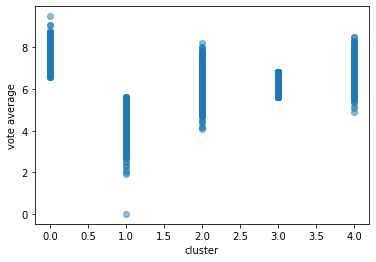

In [40]:
plt.scatter(df_numeric['cluster'], df_numeric['vote_average'], alpha=0.5)
plt.xlabel('cluster')
plt.ylabel('vote average')
plt.show()

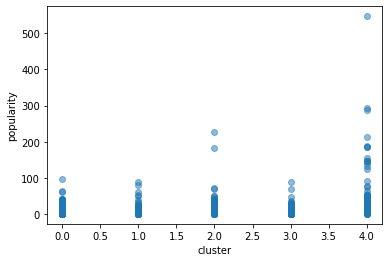

In [41]:
plt.scatter(df_numeric['cluster'], df_numeric['popularity'], alpha=0.5)
plt.xlabel('cluster')
plt.ylabel('popularity')
plt.show()

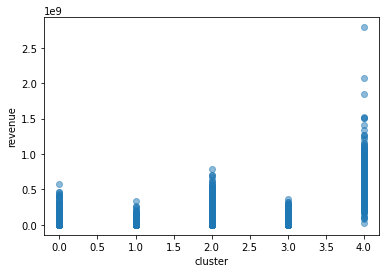

In [42]:
plt.scatter(df_numeric['cluster'], df_numeric['revenue'], alpha=0.5)
plt.xlabel('cluster')
plt.ylabel('revenue')
plt.show()

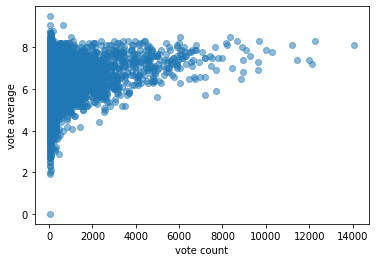

In [43]:
plt.scatter(df_numeric['vote_count'], df_numeric['vote_average'], alpha=0.5)
plt.xlabel('vote count')
plt.ylabel('vote average')
plt.show()

Saving DataFrames

In [66]:
df_numeric.to_csv(r'./cleaned_movies.csv', index=False)

In [154]:
df_cluster0.to_csv(r'./cluster0.csv', index=False)

In [158]:
df_cluster1.to_csv(r'./cluster1.csv', index=False)

In [162]:
df_cluster2.to_csv(r'./cluster2.csv', index=False)

In [168]:
df_cluster3.to_csv(r'./cluster3.csv', index=False)

In [173]:
df_cluster4.to_csv(r'./cluster4.csv', index=False)

Taking the top 10 in each cluster and saving the Dataframe

In [175]:
df_cluster0_edited = df_cluster0.iloc[:10]
df_cluster0_edited.to_csv(r'./cluster0_edited.csv', index=False)

In [176]:
df_cluster1_edited = df_cluster1.iloc[:10]
df_cluster1_edited.to_csv(r'./cluster1_edited.csv', index=False)

In [178]:
df_cluster2_edited = df_cluster2.iloc[:10]
df_cluster2_edited.to_csv(r'./cluster2_edited.csv', index=False)

In [180]:
df_cluster3_edited = df_cluster3.iloc[:10]
df_cluster3_edited.to_csv(r'./cluster3_edited.csv', index=False)

In [181]:
df_cluster4_edited = df_cluster4.iloc[:10]
df_cluster4_edited.to_csv(r'./cluster4_edited.csv', index=False)

Putting all movies together and saving the Dataframe

In [183]:
allMovies = [df_cluster0_edited, df_cluster1_edited, df_cluster2_edited, df_cluster3_edited, df_cluster4_edited]
result = pd.concat(allMovies)
result.to_csv(r'./all_movies.csv', index=False)